In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# 載入資料

In [8]:
data = pd.read_csv("C:/Users/wei/Documents/碩士/碩一/機器學習/mldata_CLEAN.csv")

In [9]:
data

,ID,ROA,ROE,Operating gross profit margin,cash flow,Debt ratio,Total asset turnover
0,0,0.236765,0.169616,0.328708,3.901708,-0.073593,-0.791617
1,1,0.146009,0.118674,0.219573,1.331257,-0.126603,-0.847592
2,2,0.087351,0.067408,-0.849893,-0.203389,-0.358257,-1.258075
3,3,0.115020,0.018088,-0.148943,-0.018207,-1.227095,-0.922225
4,4,0.063002,0.069355,-0.175562,-0.142282,-0.170601,-0.250526
...,...,...,...,...,...,...,...
927,927,-0.383027,-0.152583,0.151548,-0.241523,-0.169541,-0.493084
928,928,1.793991,0.894483,-0.033006,1.874715,-0.479121,-1.146125
929,929,-0.321048,-0.124030,0.221052,-0.123579,-0.282453,-1.108808
930,930,-0.976256,-0.458234,-0.676874,-0.179552,-0.018992,0.570440


In [4]:
#data['free cash flow']=data.cash_flow.astype(float)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             932 non-null    int64  
 1   ROA                            932 non-null    float64
 2   ROE                            932 non-null    float64
 3   Operating gross profit margin  932 non-null    float64
 4   cash flow                      932 non-null    float64
 5   Debt ratio                     932 non-null    float64
 6   Total asset turnover           932 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 51.1 KB


In [11]:
data.columns

Index(['ID', 'ROA', 'ROE', 'Operating gross profit margin', 'cash flow',
       'Debt ratio', 'Total asset turnover'],
      dtype='object')

In [13]:
col = ['ID','ROA', 'ROE', 'Operating gross profit margin','cash flow','Debt ratio','Total asset turnover']

data2 = data[col]

In [14]:
data2

,ID,ROA,ROE,Operating gross profit margin,cash flow,Debt ratio,Total asset turnover
0,0,0.236765,0.169616,0.328708,3.901708,-0.073593,-0.791617
1,1,0.146009,0.118674,0.219573,1.331257,-0.126603,-0.847592
2,2,0.087351,0.067408,-0.849893,-0.203389,-0.358257,-1.258075
3,3,0.115020,0.018088,-0.148943,-0.018207,-1.227095,-0.922225
4,4,0.063002,0.069355,-0.175562,-0.142282,-0.170601,-0.250526
...,...,...,...,...,...,...,...
927,927,-0.383027,-0.152583,0.151548,-0.241523,-0.169541,-0.493084
928,928,1.793991,0.894483,-0.033006,1.874715,-0.479121,-1.146125
929,929,-0.321048,-0.124030,0.221052,-0.123579,-0.282453,-1.108808
930,930,-0.976256,-0.458234,-0.676874,-0.179552,-0.018992,0.570440


# 資料簡述

In [15]:
data.describe()

,ID,ROA,ROE,Operating gross profit margin,cash flow,Debt ratio,Total asset turnover
count,932.000000,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02
mean,465.500000,3.218894e-12,-3.218875e-12,1.180247e-11,3.111586e-11,3.218894e-12,2.360510e-11
std,269.189524,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00
min,0.000000,-6.607505e+00,-2.562384e+01,-1.915030e+01,-7.592940e+00,-2.370525e+00,-1.351366e+00
25%,232.750000,-4.134632e-01,-1.619929e-01,-2.730145e-01,-2.035524e-01,-6.832099e-01,-6.236922e-01
50%,465.500000,-4.546191e-02,4.015217e-02,-1.392925e-02,-1.638324e-01,-2.558937e-03,-1.572343e-01
75%,698.250000,3.695771e-01,2.602243e-01,2.958787e-01,-6.531759e-02,7.004888e-01,3.838568e-01
max,931.000000,7.980839e+00,3.106722e+00,2.308226e+00,1.604038e+01,2.829246e+00,8.220349e+00


# 相關係數表

In [16]:
data_correlations = data.drop(['ID'], axis=1).corr(method='pearson')
data_correlations

,ROA,ROE,Operating gross profit margin,cash flow,Debt ratio,Total asset turnover
ROA,1.000000,0.585149,0.274062,0.095148,-0.287579,0.215145
ROE,0.585149,1.000000,0.280664,0.062918,-0.184276,0.166378
Operating gross profit margin,0.274062,0.280664,1.000000,0.051352,-0.143393,-0.042819
cash flow,0.095148,0.062918,0.051352,1.000000,-0.013420,0.013690
Debt ratio,-0.287579,-0.184276,-0.143393,-0.013420,1.000000,0.157802
Total asset turnover,0.215145,0.166378,-0.042819,0.013690,0.157802,1.000000


In [17]:
import seaborn as sns

# 相關係數熱圖

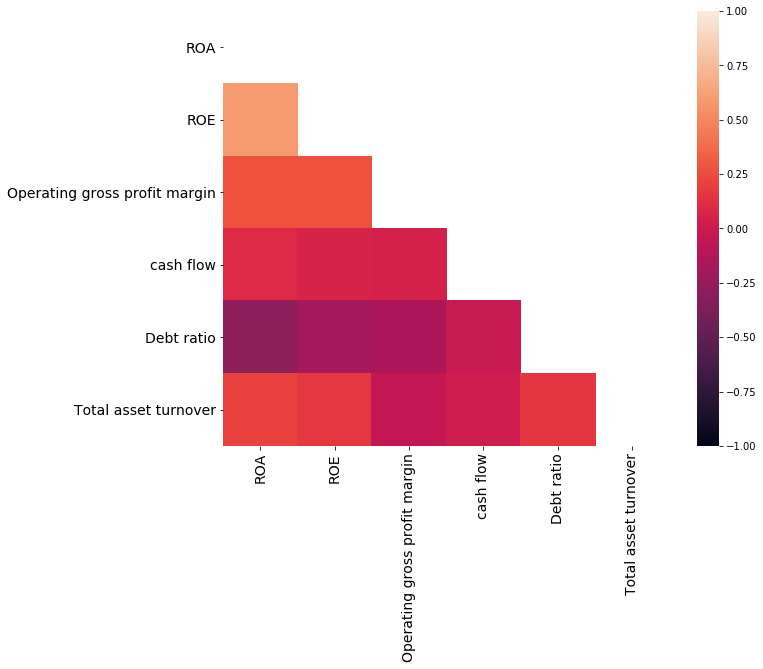

In [18]:
fig, ax = plt.subplots(figsize=(10, 8));

mask = np.zeros_like(data_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(data_correlations, vmin=-1, vmax=1, mask=mask, ax=ax);

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14);
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14);

plt.show();